12.333333333333334
1 8.666666666666668 8.666666666666668
Dsize 1 75.0 70.71067811865476
2 11.416666666666668 11.259391531017343
Dsize 1 83.33333333333333 79.37005259840998
Dsize 2 66.66666666666666 62.99605249474367
3 14.166666666666668 13.88675718674897
Dsize 1 87.5 84.08964152537145
Dsize 2 75.0 70.71067811865474
Dsize 3 62.5 59.46035575013604
4 16.916666666666664 16.522891431119284
Dsize 1 90.0 87.05505632961241
Dsize 2 80.0 75.7858283255199
Dsize 3 70.0 65.9753955386447
Dsize 4 60.0 57.43491774985174
5 19.666666666666668 19.162543924599724
Dsize 1 91.66666666666667 89.08987181403393
Dsize 2 83.33333333333333 79.37005259840997
Dsize 3 75.0 70.71067811865474
Dsize 4 66.66666666666666 62.99605249474365
Dsize 5 58.33333333333333 56.12310241546864
6 22.416666666666664 21.80395777284807
Dsize 1 92.85714285714286 90.57236642639067
Dsize 2 85.71428571428571 82.0335356007638
Dsize 3 78.57142857142857 74.29971445684743
Dsize 4 71.42857142857143 67.29500963161782
Dsize 5 64.28571428571428 60.

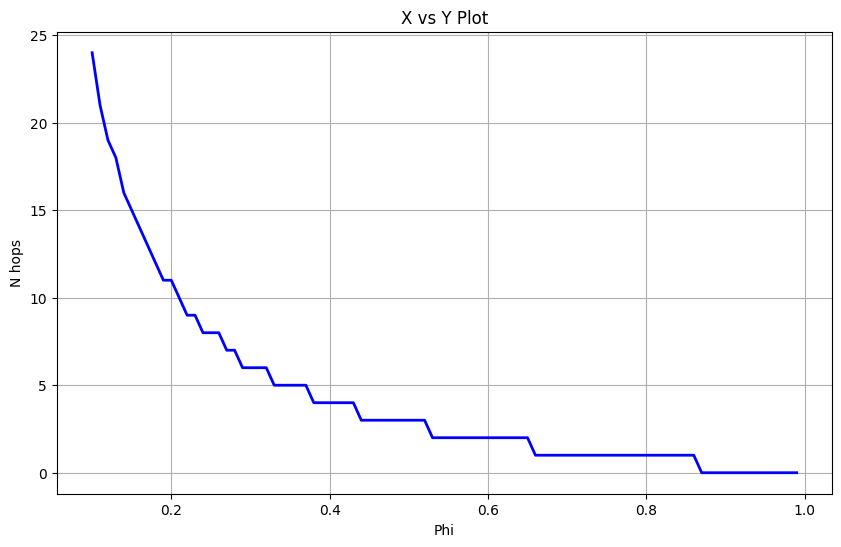

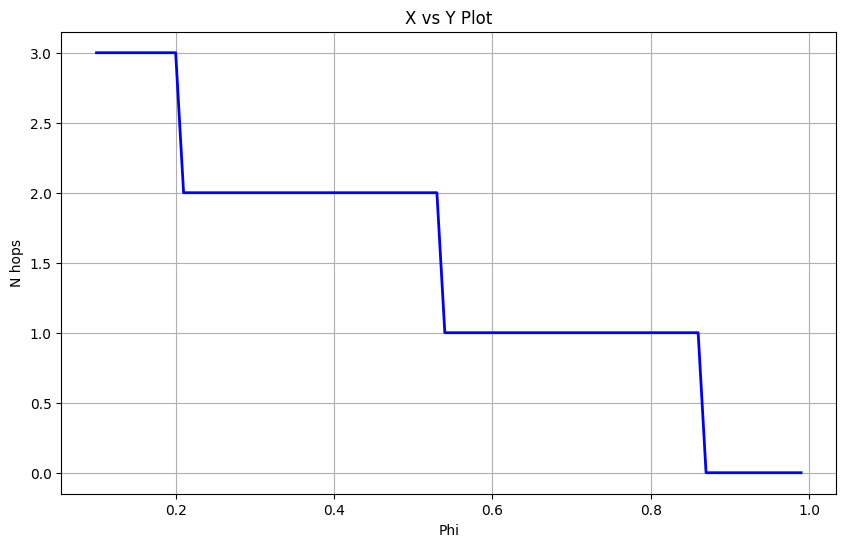

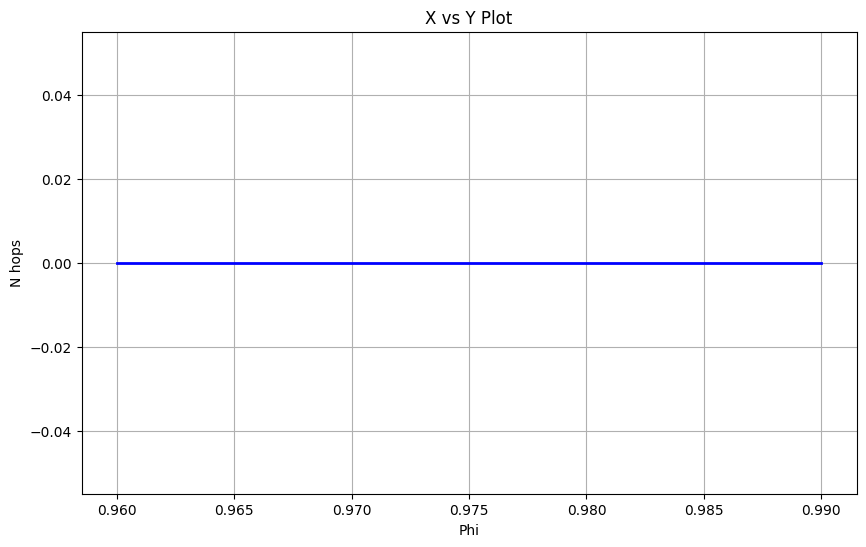

In [11]:
import math
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import yticks, draw_all

# Your existing code
D = 100

config = {
    "base": {
        "obdh": {
            "speed": 30.0,
            "phi": 0.9,
            "energy_uptime": 1,
            "energy_io": 0.001
        },
        "ground_link": {
            "speed": 10.0,
            "energy": 5,
            "distance": 700
        }
    },
    "offloading": {
        "user_satellite": {
            "obdh": {
                "phi": None,
                "speed": None,
                "energy_uptime": None,
                "energy_io": None
            },
            "isl": {
                "speed": None,
                "energy": 3,
                "distance": 100
            }
        },
        "edge_node": {
            "edge_computer": {
                "phi": None,
                "speed": 300.0,
                "energy_uptime": 50,
                "energy_io": 0.001
            },
            "ground_link": {
                "speed": None,
                "energy": 5,
                "distance": 700
            }
        }
    }
}

sgl = config["base"]["ground_link"]["speed"]
sisl = sgl * 3
sec = config["offloading"]["edge_node"]["edge_computer"]["speed"]
phi_obdh = config["base"]["obdh"]["phi"]
sobdh = config["base"]["obdh"]["speed"]

base = D * (1/sobdh) + D * (phi_obdh/sgl)
print(base)

x = np.arange(0.1, 1, 0.01)
y_first = []
y_last = []
y_even=[]

for phi in x:
    value = ( (-1/sisl) - (1/sec) - ((phi-phi_obdh)/sgl) + (1/sobdh) ) * (sisl/phi) + 1
    y_first.append(math.floor(value))



for phi in x:
    value = ( (-1/sisl) - (1/sec) - ((phi-phi_obdh)/sgl) + (1/sobdh) ) * sisl + 1
    y_last.append(math.floor(value))

beta=D-(D*phi_obdh)

for phi in x:
    if phi == 0:
        continue

    # Define terms
    B = D * (1/sisl + 1/sec)

    # Calculate the constant term inside the square brackets
    constant = B * (1 - phi) / 2 - D/sobdh + beta/sgl

    # Calculate discriminant terms
    discriminant_term1 = constant**2
    discriminant_term2 = 4 * B * (D * (phi - 1) * (0.5 * (1/sisl + 1/sec) - 1/sgl))

    discriminant = discriminant_term1 - discriminant_term2

    # Check if discriminant is non-negative
    if discriminant < 0:
        y_even.append(np.nan)
    else:
        # Calculate only the positive root
        sqrt_term = math.sqrt(discriminant)
        N_positive = (-constant + sqrt_term) / (2 * B)

        # Floor the result
        y_even.append(math.floor(N_positive))

phi=0.5
alpha = D/2
for nsat in range(1, 11):
    cost_a = (D/sisl) + (D/sec) + (D - alpha) / sgl
    cost_p = (D/sisl) + (D/sec) + (D * phi) / sgl

    if nsat > 1:
        it_phi=np.power(phi, 1/nsat)
        for nth in range(1, nsat):
            d_a=D-(nth*(alpha/nsat))
            d_p=D*np.power(it_phi, nth)

            cost_a += d_a/sisl
            cost_a += d_a/sec

            cost_p += d_p/sisl
            cost_p += d_p/sec

            print("Dsize", nth, d_a, d_p)

    print(nsat, cost_a, cost_p)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y_first, 'b-', linewidth=2)
plt.xlabel('Phi')
plt.ylabel('N hops')
plt.title('X vs Y Plot')
plt.grid(True)
plt.show()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y_last, 'b-', linewidth=2)
plt.xlabel('Phi')
plt.ylabel('N hops')
plt.title('X vs Y Plot')
plt.grid(True)
plt.show()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y_even, 'b-', linewidth=2)
plt.xlabel('Phi')
plt.ylabel('N hops')
plt.title('X vs Y Plot')
plt.grid(True)
plt.show()